
Contours
====

----



 - Learn to find contours, draw contours etc

 functions : **cv2.findContours()**, **cv2.drawContours()**
    
What are contours?
----

Contours can be explained simply as a curve joining all the continuous points (along the boundary), having same color or intensity. The contours are a useful tool for shape analysis and object detection and recognition.


 - For better accuracy, use binary images. So before finding contours, apply threshold or canny edge detection.

 - findContours function modifies the source image. So if you want source image even after finding contours, already store it to some other variables.

 - In OpenCV, finding contours is like finding white object from black background. So remember, object to be found should be white and background should be black.

Let's see how to find contours of a binary image:


In [1]:
%pylab inline
import numpy as np
import cv2

 
im = cv2.imread('images/lightning.png')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

print ("Found " +str(len(contours)) + " contours!")

Populating the interactive namespace from numpy and matplotlib
Found 2 contours!


See, there are three arguments in **cv2.findContours()** function, first one is source image, second is contour retrieval mode, third is contour approximation method. And it outputs the image, contours and hierarchy. ``contours`` is a Python list of all the contours in the image. Each individual contour is a Numpy array of (x,y) coordinates of boundary points of the object.

>**Note**


How to draw the contours?
----

To draw the contours, ``cv2.drawContours`` function is used. It can also be used to draw any shape provided you have its boundary points. Its first argument is source image, second argument is the contours which should be passed as a Python list, third argument is index of contours (useful when drawing individual contour. To draw all contours, pass -1) and remaining arguments are color, thickness etc.

To draw all the contours in an image:


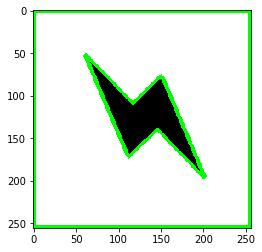

In [2]:
img =im.copy()
cv2.drawContours(img, contours, -1, (0,255,0), 3)
imshow(img)

To draw an individual contour, say 2nd contour:


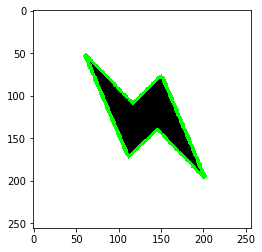

In [3]:
img=im.copy()
cv2.drawContours(img, contours, 1, (0,255,0), 3)
imshow(img)

But most of the time, below method will be useful:


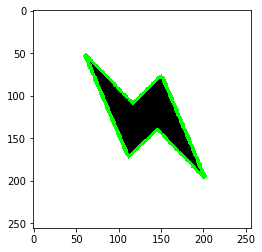

In [4]:
cnt = contours[1]
img=im.copy()
cv2.drawContours(img, [cnt], 0, (0,255,0), 3)
imshow(img)


>**Note**

Contour Approximation Method
----

This is the third argument in ``cv2.findContours`` function.

Above, we told that contours are the boundaries of a shape with same intensity. It stores the (x,y) coordinates of the boundary of a shape. But does it store all the coordinates ? That is specified by this contour approximation method. 

If you pass ``cv2.CHAIN_APPROX_NONE``, all the boundary points are stored. But actually do we need all the points? For eg, you found the contour of a straight line. Do you need all the points on the line to represent that line? No, we need just two end points of that line. This is what ``cv2.CHAIN_APPROX_SIMPLE`` does. It removes all redundant points and compresses the contour, thereby saving memory.

Below image of a rectangle demonstrate this technique. Just draw a circle on all the coordinates in the contour array (drawn in blue color). First image shows points I got with ``cv2.CHAIN_APPROX_NONE`` (734 points) and second image shows the one with ``cv2.CHAIN_APPROX_SIMPLE`` (only 4 points). See, how much memory it saves!!!

<img src="images/none.jpg"  >